Корреляция: -0.9999999999999998


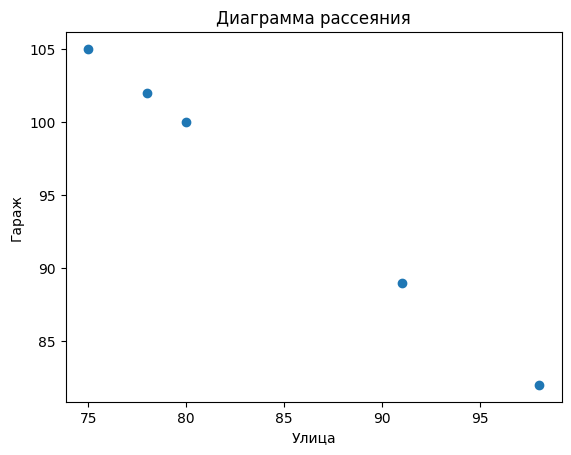

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем таблицу с данными
data = {
    'День': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'],
    'Улица': [80, 98, 75, 91, 78],
    'Гараж': [100, 82, 105, 89, 102]
}

df = pd.DataFrame(data)

# Вычисляем корреляцию
correlation = df['Улица'].corr(df['Гараж'])
print('Корреляция:', correlation)

# Строим диаграмму рассеяния
plt.scatter(df['Улица'], df['Гараж'])
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.title('Диаграмма рассеяния')
plt.show()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000
Slope (наклон): 9.987771906652386e-05
Intercept (сдвиг): 29.337977354094626
MSE: 35.69824399590979


<ipython-input-4-3b97d64f2870>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


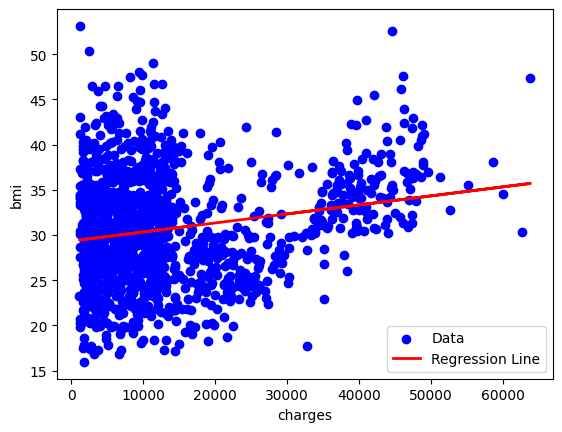

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных из CSV-файла
data = pd.read_csv('insurance.csv')

# Проверка наличия пропущенных значений
print(data.isnull().sum())

# Удаление строк с пропущенными значениями (если необходимо)
data = data.dropna()

# Описание признаков
print(data.describe())

# Корреляционная матрица
corr_matrix = data.corr()
print(corr_matrix)

# Находим наиболее коррелирующую переменную с целевой переменной
target_variable = 'bmi'
most_correlated_variable = corr_matrix[target_variable].sort_values(ascending=False).index[1]

# Регрессия
X = data[most_correlated_variable].values.reshape(-1, 1)
y = data[target_variable].values.reshape(-1, 1)

# Инициализация и обучение модели линейной регрессии
regression_model = LinearRegression()
regression_model.fit(X, y)

# Получение наклона и сдвига (коэффициенты) модели
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]

# Вычисление среднеквадратичной ошибки (MSE)
y_pred = regression_model.predict(X)
mse = mean_squared_error(y, y_pred)

print('Slope (наклон):', slope)
print('Intercept (сдвиг):', intercept)
print('MSE:', mse)

# Построение графика
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(most_correlated_variable)
plt.ylabel(target_variable)
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Уникальные регионы: ['southwest' 'southeast' 'northwest' 'northeast']
Однофакторный ANOVA тест (первый способ):
F-значение: 39.49505720170283
p-значение: 1.881838913929143e-24
Однофакторный ANOVA тест (второй способ):
                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0    

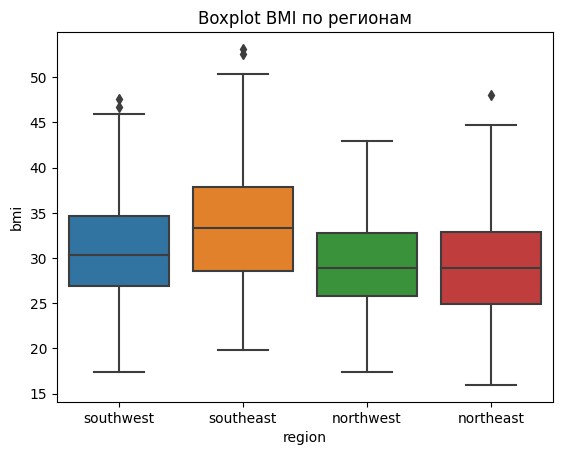

Двухфакторный ANOVA тест:
                sum_sq      df          F        PR(>F)
region     4034.975135     3.0  39.336119  2.342323e-24
sex          86.007035     1.0   2.515393  1.129767e-01
Residual  45578.312720  1333.0        NaN           NaN


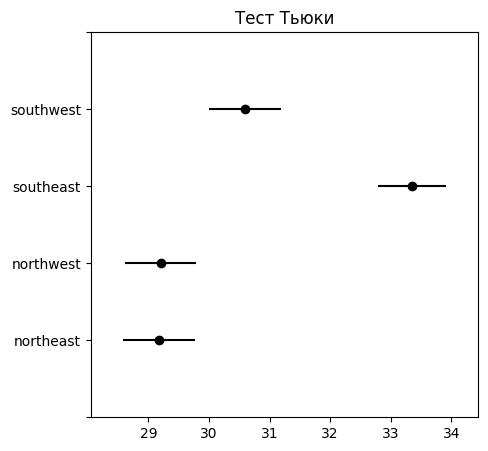

In [8]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из CSV-файла
data = pd.read_csv('insurance.csv')

# Предобработка данных

# Вывод информации о данных
print(data.info())

# Проверка наличия пропущенных значений
print(data.isnull().sum())

# Вывод списка уникальных регионов
unique_regions = data['region'].unique()
print("Уникальные регионы:", unique_regions)

# Однофакторный ANOVA тест - первый способ

# Группировка данных по регионам
grouped_data = data.groupby('region')['bmi'].apply(list)

# Выполнение ANOVA теста
fvalue, pvalue = stats.f_oneway(*grouped_data)
print("Однофакторный ANOVA тест (первый способ):")
print("F-значение:", fvalue)
print("p-значение:", pvalue)

# Однофакторный ANOVA тест - второй способ

# Создание модели с формулой индекса массы тела (BMI) в зависимости от региона
model = ols('bmi ~ region', data=data).fit()

# Выполнение ANOVA теста
anova_table = sm.stats.anova_lm(model, typ=2)
print("Однофакторный ANOVA тест (второй способ):")
print(anova_table)

# T-критерий Стьюдента для всех комбинаций

# Выполнение попарных сравнений регионов с использованием t-критерия Стьюдента
pairwise_results = pairwise_tukeyhsd(data['bmi'], data['region'], alpha=0.05)

# Поправка Бонферрони
pairwise_results_bonf = pairwise_tukeyhsd(data['bmi'], data['region'], alpha=0.05)
pairwise_results_bonf.summary()

# Построение графика
sns.boxplot(x='region', y='bmi', data=data)
plt.title("Boxplot BMI по регионам")
plt.show()

# Двухфакторный ANOVA тест

# Создание модели с формулой индекса массы тела (BMI) в зависимости от региона и пола
model2 = ols('bmi ~ region + sex', data=data).fit()

# Выполнение ANOVA теста
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print("Двухфакторный ANOVA тест:")
print(anova_table2)

# Пост-хок тест Тьюки

# Выполнение пост-хок теста для определения статистически значимых различий между группами
tukey_results = pairwise_tukeyhsd(data['bmi'], data['region'], alpha=0.05)

# Построение графика

fig = tukey_results.plot_simultaneous(figsize=(5,5))
plt.title("Тест Тьюки")
plt.show()

